This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



### Import Libraries and load the dataset

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn import metrics

sns.set_style("darkgrid")


%matplotlib inline

In [2]:
# Loading the data
data_df = pd.read_csv("pima-indians-diabetes-1.csv")
data_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Check dimension of dataset and understand

In [3]:
# Find out number of records and number of features(columns)
data_df.shape
# Below data indicates that there are 768 records and 9 columns

(768, 9)

In [4]:
#understanding the structure of dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- From the output Above it indicates that all data types are either int or float, and have non null values

In [5]:
#understanding Statistical description of numerical columns and finding detailed summary of each features (columns)
data_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- You are getting a picture of how data is available, what is mean, min and max along with standard deviation and median. 
- The percentiles are also there. Standard Deviation is quite useful tool to figure out how the data is spread above or below the mean. The higher the value, the less is reliable or vice versa.
- Above data shows that there are lot of indipendent variables(features) whos min is 0, we may have to further analyze to check if these are outliers

In [6]:
#Check for null value against each fo the features
data_df.isna().sum()
#From the output we can see there are no NaN found

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [7]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

#data_df.applymap(np.isreal).any().any()
data_df[~ data_df.applymap(np.isreal).all(1)]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


- There are no records with corrupted values

In [8]:
#Check for features with zero value
data_df[data_df[:]==0].count()
#So many features with zero values, we need to take necessary actions here or use imput method

Preg     111
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64

In [9]:
# Lets check by featurewise data

#Pregnancies feature make sense having zero values , no action against it

#Glucose , BloodPressure , SkinThickness , Insulin ,BMI lets check the %

#Finding out how many zeros are there in each independent variable (columns) which are not relavant 
pd.DataFrame({'Zeros Count':(data_df[data_df[:]==0].count()),'Perc Zero':(data_df[data_df[:]==0].count()/data_df.count())*100})

,Perc Zero,Zeros Count
Preg,14.453125,111
Plas,0.651042,5
Pres,4.557292,35
skin,29.557292,227
test,48.697917,374
mass,1.432292,11
pedi,0.000000,0
age,0.000000,0
class,65.104167,500


- Preg has 14% zeros , however it looks relavant [need to analyze furhter to check if this has close relationship with target]
- We can ignore Class, since its target variable
- age and pedi have no zero values so its fine here
- Plas, mass and Pres columns have less than 5% of values as zero , so we can infact ignore those [ delete rows] or imput it with median value
- skin has between 5% to 36% so we can use impute method to fill the zeros
- Insulin test has more than 48% missing/zero values, so this column we have to drop for our analysis

#### Lets take care of missing/non valid(zero) data as per our analysis above

In [10]:
# making copy of original data
newdata = data_df.copy()

In [11]:
#Replace all zeros with NaN then use imput methods to replace it with values

newdata['Plas']=newdata['Plas'].replace(0,np.NAN)
newdata['Pres'] = newdata['Pres'].replace(0,np.NAN)
newdata['skin'] = newdata['skin'].replace(0,np.nan)
newdata['mass'] = newdata['mass'].replace(0,np.nan)

In [12]:
#Now replace these NAN values with the median values  ( as median is not affected by outliers)

newdata['Plas'].fillna(newdata['Plas'].median(),inplace=True)
newdata['Pres'].fillna(newdata['Pres'].median(),inplace=True)
newdata['skin'].fillna(newdata['skin'].median(),inplace=True)
newdata['mass'].fillna(newdata['mass'].median(),inplace=True)

In [13]:
# Lets drop he test column as it has 48% missing values
newdata.drop(labels='test',axis=1,inplace=True)

In [14]:
#Lets cross check if all missing/zero values are taken care
pd.DataFrame({'Zeros Count':(newdata[newdata[:]==0].count()),'Perc Zero':(newdata[newdata[:]==0].count()/newdata.count())*100})

,Perc Zero,Zeros Count
Preg,14.453125,111
Plas,0.000000,0
Pres,0.000000,0
skin,0.000000,0
mass,0.000000,0
pedi,0.000000,0
age,0.000000,0
class,65.104167,500


In [15]:
newdata.head()

,Preg,Plas,Pres,skin,mass,pedi,age,class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


#### Perfrom Univariate/Multivariate Analysis, use Visualization to understand

In [141]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
newdata.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,Preg,Plas,Pres,skin,mass,pedi,age
class,,,,,,,
0,500,500,500,500,500,500,500
1,267,267,267,267,267,267,267


#### Lets plot histogram for all features

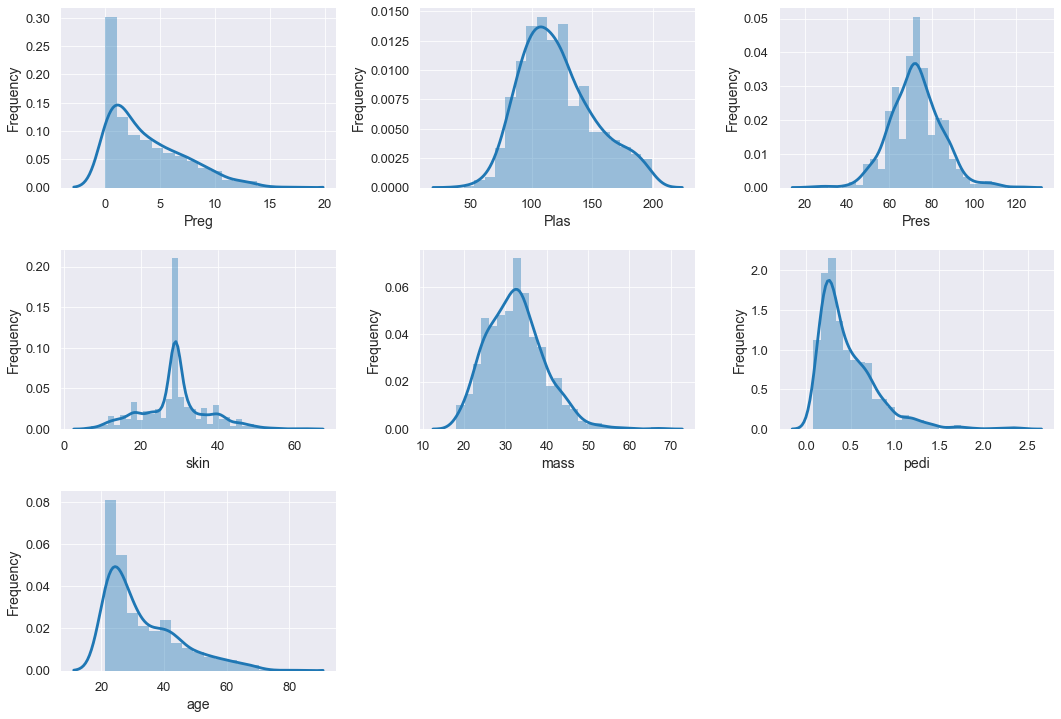

In [169]:
plt_count=1
plt.figure(figsize=(15,10))
for feature in features:
    plt.subplot(3,3,plt_count)
    plt.tight_layout()
    plt.ylabel('Frequency')
    sns.distplot(newdata[feature])
    plt_count = plt_count+1

plt.show()

- From the graph we can see that Pres and skin feature distribution is normal, though there is light skewness in Plas and mass we can say these are also distributed normally
- features Preg, age and pedi are right skewed

#### Lets plot violin plot , violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data
- we can see the median IQR

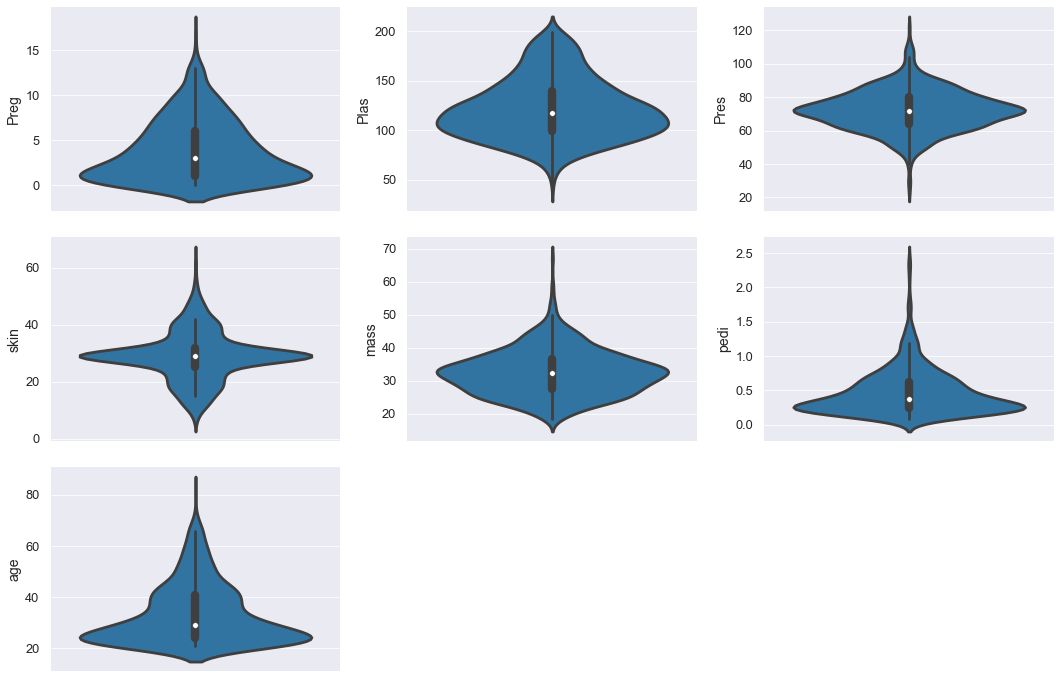

In [188]:
plt_count=1
plt.figure(figsize=(15,10))
for feature in features:
    plt.subplot(3,3,plt_count)
    plt.tight_layout()
    #plt.ylabel('Frequency')
    sns.violinplot(y=newdata[feature])
    plt_count = plt_count+1

plt.show()

- The white dot represents the median
- The thick black bar in the center represents the interquartile range
- On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

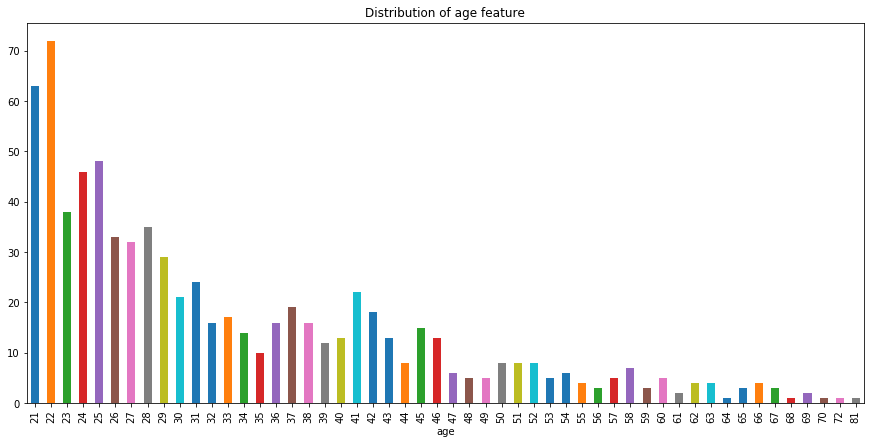

In [18]:
#Lets check the stribution by Age now
newdata.groupby('age')['age'].count().plot.bar(title='Distribution of age feature',figsize=(15,7))

- From distribution we can see that there more number of people with age ranging from 21 to 29

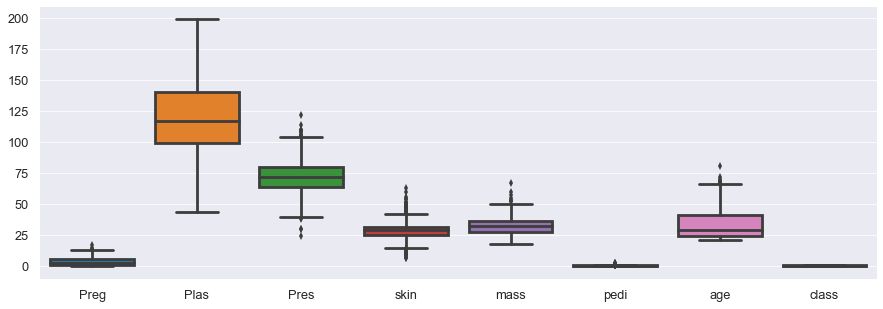

In [189]:
# Lets check if there are any outliers in features using box plot

plt.figure(figsize=(15,5))
sns.boxplot(data=newdata)

- From the graph above we can see tht Pres , skin and mass has outliers ( Age looks relavent and we can keep it as it is) we can try to remove or fix the outliers of Pres, skin and mass

In [20]:
# Lets check these Pres,skin and mass for more anlaysis 
newdata[['Pres','skin','mass']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pres,768.0,72.386719,12.096642,24.0,64.0,72.0,80.0,122.0
skin,768.0,29.108073,8.791221,7.0,25.0,29.0,32.0,99.0
mass,768.0,32.455208,6.875177,18.2,27.5,32.3,36.6,67.1


- Considering the Five number theory and Imperical rule we can try to remove the outliers from these 3 features ( Pres ,skin and mass )

- We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 6 standard deviations from the mean


In [21]:
# Taking care of Pres outliers 
data_mean = newdata['Pres'].mean()
cutoff = newdata['Pres'].std()*6
lower ,upper = data_mean - cutoff , data_mean + cutoff
lower,upper

newdata[((newdata['Pres'] > upper) | (newdata['Pres'] < lower)) ]

#So these are the outliers for Pres which we have to remove

,Preg,Plas,Pres,skin,mass,pedi,age,class


- Nothing falls outside the 6 std for Pres feature 

In [22]:
# Taking care of skin outliers 
data_mean = newdata['skin'].mean()
cutoff = newdata['skin'].std()*6
lower ,upper = data_mean - cutoff , data_mean + cutoff
lower,upper

newdata[((newdata['skin'] > upper) | (newdata['skin'] < lower)) ]

#So these are the outliers for skin which we have to remove

,Preg,Plas,Pres,skin,mass,pedi,age,class
579,2,197.0,70.0,99.0,34.7,0.575,62,1


In [23]:
#Remove the outliers indexes for skin feature
newdata.drop(newdata[((newdata['skin'] > upper) | (newdata['skin'] < lower)) ].index,inplace=True)

In [24]:
# Taking care of mass outliers 
data_mean = newdata['mass'].mean()
cutoff = newdata['mass'].std()*6
lower ,upper = data_mean - cutoff , data_mean + cutoff
lower,upper

newdata[((newdata['mass'] > upper) | (newdata['mass'] < lower)) ]

#So these are the outliers for mass which we have to remove

,Preg,Plas,Pres,skin,mass,pedi,age,class


- Nothing falls outside the 6 std for mass feature 

######  Now that we have taken care all the missing values, zeros or  invalid data and outliers fromt the dataset, Lets check how the features are related

## Do correlation analysis and bivariate viualization with Insights

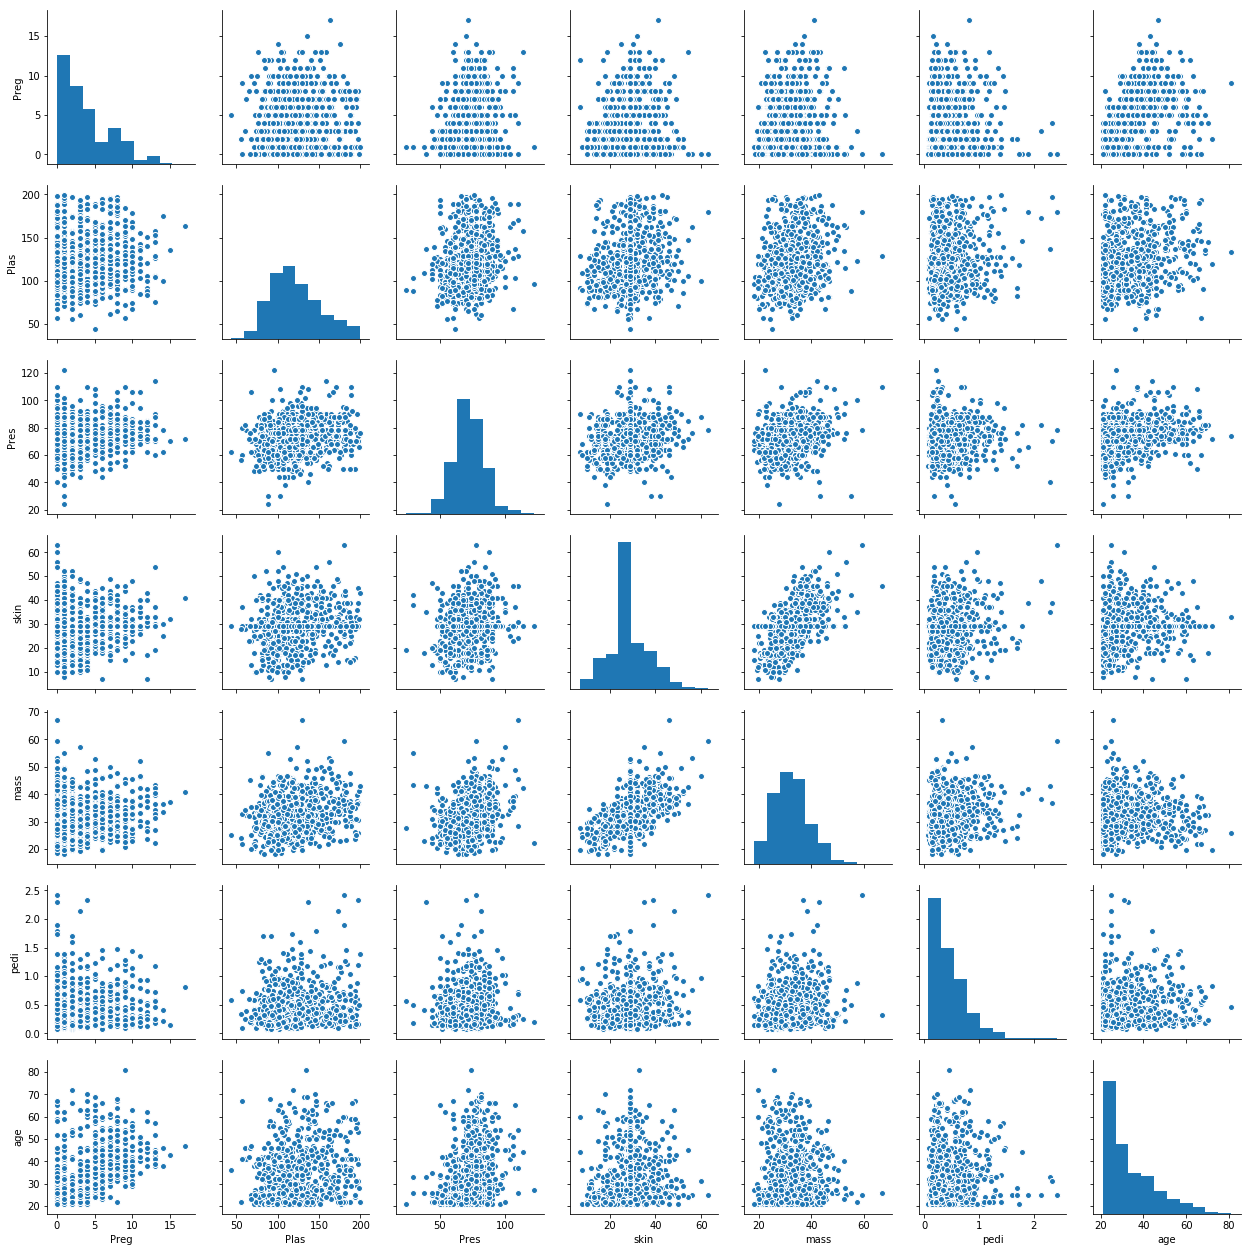

In [25]:
sns.pairplot(newdata[['Preg','Plas','Pres','skin','mass','pedi','age']])

- Attributes which look normally distributed (plas, pres, skin, and mass).
- Some of the attributes look like they may have an exponential distribution (preg, pedi, age).
- Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution
- There is no obvious relationship between age and onset of diabetes.
- There is no obvious relationship between pedi function and onset of diabetes.


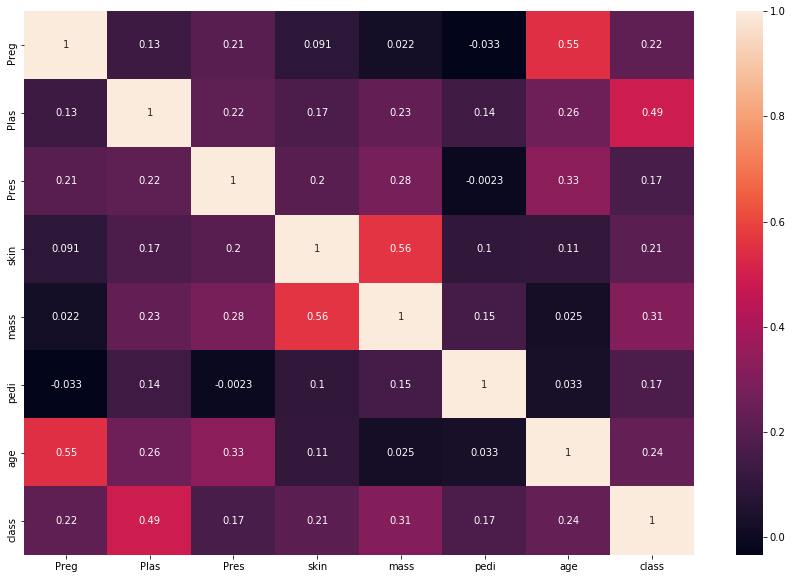

In [26]:
corr = newdata.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

With this heat map now we can clearly see below things

- There is little correlation between Plas and class (means as Plas increases there is high chances of getting diangnosed with diabetes)
- There is no much correlation between preg and class, (means as preg increases there is high chances of getting diangnosed with diabetes)



### Lets now use Naive Bayes algorithm to predict response variable

In [28]:
#Lets first take out feature set and target seperately

features = newdata[['Preg','Plas','Pres','skin','mass','pedi','age']]
target = newdata[['class']]
features.head()

,Preg,Plas,Pres,skin,mass,pedi,age
0,6,148.0,72.0,35.0,33.6,0.627,50
1,1,85.0,66.0,29.0,26.6,0.351,31
2,8,183.0,64.0,29.0,23.3,0.672,32
3,1,89.0,66.0,23.0,28.1,0.167,21
4,0,137.0,40.0,35.0,43.1,2.288,33


In [29]:
target.head()

,class
0,1
1,0
2,1
3,0
4,1


In [30]:
# Split the train test , use 70:30 ratio

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=1)

In [31]:
y_test[y_test==1].count()

class    84
dtype: int64

In [32]:
# Lets create object of Naive Bayes 
# we will use GaussianNB assuming data is normally distributed
# then fit the 70% train data

model  = GaussianNB()
model.fit(x_train,y_train.values.ravel())

GaussianNB(priors=None)

In [33]:
# Lets predict now

y_pred = model.predict(x_test)

### Getting Accuracy and Statistics

- It’s time to test the quality of our model. We have made some predictions. Let’s compare the model’s prediction with actual target values for the test set. By following this method, we are going to calculate the accuracy of our model

In [35]:
print("GaussianNB Model's accuracy score is %s"%(metrics.accuracy_score(y_test,y_pred)))

GaussianNB Model's accuracy score is 0.7792207792207793


- Our model is giving an accuracy of 77.92%. This is not good accuracy score. You can create random test datasets and test the model to get know how well the trained Gaussian Naive Bayes model is performing

In [43]:
#Lets print confustion metrics
confusion_df = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1
Class 0                120                 27
Class 1                 24                 60


In [44]:
#Lets print confustion metrics
#print(metrics.confusion_matrix(y_test, y_pred))

- From the confusion metrics we can infer as below
- FP cases : 
> total there are 147 cases with class values as 0 ( non-diabeties) , our model has predicted correct for 120 records and failed to predict for 27 (means predicted it has diabetic)
- TP cases :
> total there are 84 cases with class values as 1 ( diabeties) , our model has predicted correct for 60 records and failed to predict for 24 (means predicted it has non-diabetic)
- Lets check Precision and Recall score

In [37]:
#Lets check classificaiton report (precision , recall and f1-score)
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.82      0.82       147
          1       0.69      0.71      0.70        84

avg / total       0.78      0.78      0.78       231



- Precision > which is nothing but accuracy of positive prediction
 > - From the report we can see that precision for 0 (non-diabetic) prediction is 83%, which means the model has predicted correctly as non-diabetic for 83% of the test data and failed for 17% of the cases where it has predicted as diabetic instead of non-diabetic , here prediction looks decent
 > - from the report for diabetic cases (1) ,  the model prediction is not good, it has predicted 69% cases as diabetic correctly however it has failed for 31% cases by predicting it as non-diabetic
- Recall > which is nothing but true positive rate, Fraction of positives That were correctly identified
 > - from the report we see that recall for 1 is 71% which is not a good number
 > - from the report we see that recall for 1 is 82% which is ok but not a great prediction too
- f1-score >  F1 Score takes into account precision and the recall
 > - f1 score for class 1 is 70% which is also not a good number
 
- Overall we can say that the model prediction is not very accurate and cannot be used in production


## Summary/Conclusion

- From first look of data, we found that there are 768 records with 8 features and 1 response variable
- We noticed that though there were no missing values in the data set, we found that few features(columns) had error values(Zeros)
- We had to drop rows for few and apply Impute methods to fix some features
- As per initial analysis, data distribution were skewed when checked using distplot and using scatter plot we found no major relationship between independent variables
- Then to check the correlation we used heatmap from seaborn library and noticed that no strong correlation between any of the featurs( independent variables)
- Since there were error values(zero values) in some of the features , we had to follow below thumb rule to eliminate error value rows or delete independent variable
    - if data is <5% then we can ignore it and delete the rows
    - if data is > 5% and <36% then we use impute methods ( mean, median) (Applied this on Plas, Pres, mass and skin column)
    - if data is >36% we can delete the column or use multiple Imput method to fix it ( We actually excluded feature test from our dataset for analysis)
- On further analysing we found out that ther is 2:1 ratio in the data set, i.e there are more data/records for class 0 and less for class 1, which means that the model prediction would be better in identifying class 0
- Then using boxplot we found that few columns had outliers and used Imperical rule to fix the same
- After fixing error values and outliers , when we plot heatmap we found below correlation
    - There is little correlation between Plas and class (means as Plas increases there is high chances of getting diangnosed with diabetes)
    - There is no much correlation between preg and class, (means as preg increases there is high chances of getting diangnosed with diabetes)

### After that we proceeded with applying Naive Bayes algo

- We did train test split with 70:30 ratio ( 70% for training and 30% for testing the model)
- We used GaussianNB type and fit the model
- Then with this model we observed below
    - we got accuracy score of 77.9% , which is not a great score
    - we also went ahead and checked precision , recall and f1-score , which was also not very strong to consider this model

### Overall we found out that there was no much correlation between feature set and response variable , also the model Naive Bayes did not give us good prediction/accuracy score
